PASSED solar_dec
PASSED solar_altitude
PASSED sza
PASSED solar_azimuth
PASSED ppfd
PASSED fraction_shade_veg
PASSED fraction_shade_bank
PASSED energy_total_surface_PAR_ppfd


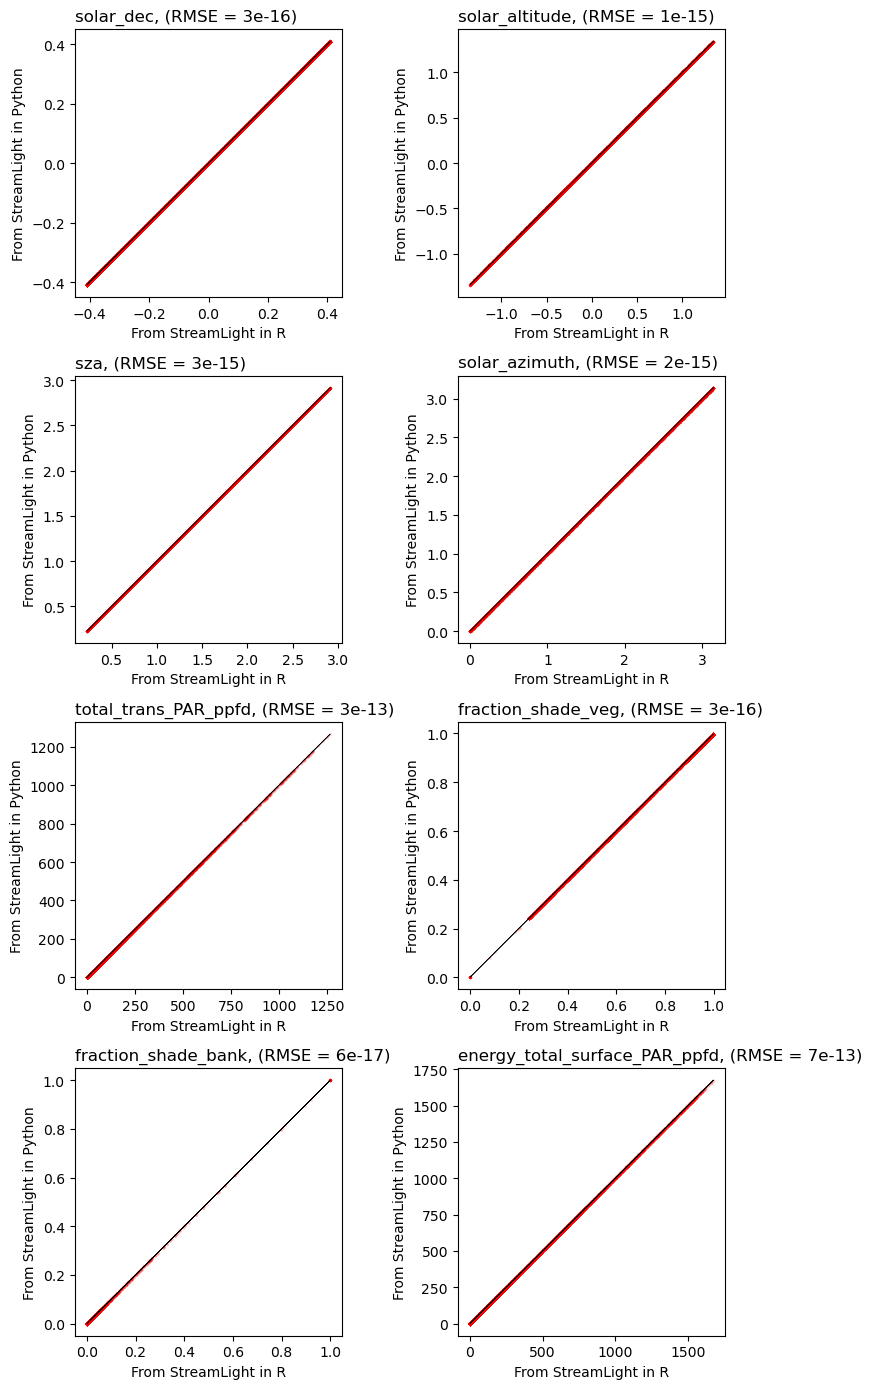

In [1]:
import stream_light

sl = stream_light.StreamLight()
path_data_test = './data_test_streamlight/'
plot_scatter = True
sl.test_streamlight(path_data_test,plot_scatter)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.metrics import mean_squared_error


path_data_test = './data_test_streamlight/'

# Files with the drivers and results
input_data_test_streamlight_df = pd.read_csv(os.path.join(path_data_test,'input_data_test_streamlight.csv'))
# input_data_test_streamlight_df.head()
results_test_streamlight_df = pd.read_csv(os.path.join(path_data_test,'results_test_streamlight.csv'))
# results_test_streamlight_df.head()
test_solar_geo_calc_df = pd.read_csv(os.path.join(path_data_test,'input_data_test_solar_geo_calc.csv'))
# test_solar_geo_calc_df.head()
test_rt_cn_1998_df = pd.read_csv(os.path.join(path_data_test,'input_data_test_RT_CN_1998.csv'))
# test_rt_cn_1998_df.head()
test_shade2_df = pd.read_csv(os.path.join(path_data_test,'input_data_test_SHADE2.csv'))
# test_shade2_df.head()
test_stream_light_df = pd.read_csv(os.path.join(path_data_test,'input_data_test_stream_light.csv'))
# test_stream_light_df.head()


# Extract information from drivers
doy = input_data_test_streamlight_df['DOY'].values
hour = input_data_test_streamlight_df['Hour'].values
tz_offset = input_data_test_streamlight_df['offset'].values
sw_inc = input_data_test_streamlight_df['SW_inc'].values
lai = input_data_test_streamlight_df['LAI'].values

In [5]:
path_data_test = None
print(path_data_test is None)

True


In [2]:
import stream_light

sl = stream_light.StreamLight()

# Channel characteristics 
sl.set_channel_properties(lat = 35.9925,lon = -79.0460,channel_azimuth = 330,bottom_width = 18.9,
bank_height = 0.1,bank_slope = 100, water_depth = 0.05,
tree_height = 23, overhang = 2.3, overhang_height = 0.1*23, x_LAD = 1)

# Energy drivers
sl.set_energy_drivers(doy = doy, hour = hour, tz_offset = tz_offset, sw_inc = sw_inc, lai = lai)

# Run StreamLight
sl.run_streamlight()


{'solar_dec': array([-0.40248896, -0.40243564, -0.40238211, ..., -0.30458557,
        -0.30478144, -0.30497716]),
 'solar_altitude': array([-0.36735674, -0.57572354, -0.78714071, ...,  0.21217116,
         0.02442878, -0.17629844]),
 'sza': array([1.93815307, 2.14651986, 2.35793704, ..., 1.35862517, 1.54636755,
        1.74709476]),
 'solar_azimuth': array([ 4.47081696,  4.60653821, -1.527597  , ...,  4.14714126,
         4.31311699,  4.46222051])}

In [ ]:
sl.get_solar_angles()
sl.solar_angles

In [4]:
sl.get_radiative_transfer_estimates_cn_1998()
sl.energy_response

{'diff_trans_PAR': array([0.        , 0.        , 0.        , ..., 9.03132743, 1.36868204,
        0.        ]),
 'beam_trans_PAR': array([0., 0., 0., ..., 0., 0., 0.]),
 'total_trans_PAR': array([0.        , 0.        , 0.        , ..., 9.03132743, 1.36868204,
        0.        ]),
 'diff_trans': array([ 0.        ,  0.        ,  0.        , ..., 18.06265487,
         2.73736409,  0.        ]),
 'beam_trans': array([0., 0., 0., ..., 0., 0., 0.]),
 'total_trans': array([ 0.        ,  0.        ,  0.        , ..., 18.06265487,
         2.73736409,  0.        ]),
 'ppfd': array([ 0.        ,  0.        ,  0.        , ..., 38.43118056,
         5.82417891,  0.        ]),
 'par_surface_original': None,
 'energy_diff_surface_PAR': None,
 'energy_beam_surface_PAR': None,
 'energy_total_surface_PAR': None,
 'energy_diff_surface': None,
 'energy_beam_surface': None,
 'energy_total_surface': None,
 'energy_total_surface_PAR_ppfd': None}

In [5]:
sl.get_riparian_stream_shading()
sl.shading_response

{'perc_shade_veg': array([0.99342384, 0.99630134, 0.99780252, ..., 0.9877567 , 0.89259488,
        0.98572885]),
 'perc_shade_bank': array([0.00657616, 0.00369866, 0.00219748, ..., 0.0122433 , 0.10740512,
        0.01427115])}

In [7]:
sl.get_energy_stream()
sl.energy_response

{'diff_trans_PAR': array([0.        , 0.        , 0.        , ..., 9.03132743, 1.36868204,
        0.        ]),
 'beam_trans_PAR': array([0., 0., 0., ..., 0., 0., 0.]),
 'total_trans_PAR': array([0.        , 0.        , 0.        , ..., 9.03132743, 1.36868204,
        0.        ]),
 'diff_trans': array([ 0.        ,  0.        ,  0.        , ..., 18.06265487,
         2.73736409,  0.        ]),
 'beam_trans': array([0., 0., 0., ..., 0., 0., 0.]),
 'total_trans': array([ 0.        ,  0.        ,  0.        , ..., 18.06265487,
         2.73736409,  0.        ]),
 'ppfd': array([ 0.        ,  0.        ,  0.        , ..., 38.43118056,
         5.82417891,  0.        ]),
 'par_surface_original': array([ 0.        ,  0.        ,  0.        , ..., 37.96065598,
         5.19863225,  0.        ]),
 'energy_diff_surface_PAR': array([0.        , 0.        , 0.        , ..., 8.92075416, 1.22167858,
        0.        ]),
 'energy_beam_surface_PAR': array([0., 0., 0., ..., 0., 0., 0.]),
 'energy_t

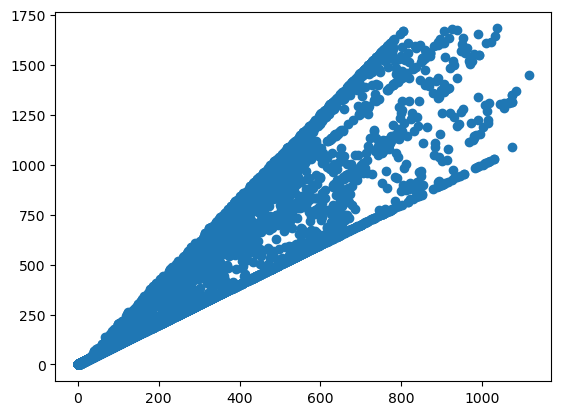

In [9]:
fig, ax = plt.subplots(1)
ax.scatter(sl.energy_response['par_surface_original'],sl.energy_response['energy_total_surface_PAR_ppfd'])
